In [3]:
import duckdb
import polars as pl
import os
import pyarrow
import json
import matplotlib.pyplot as plt

In [4]:
ratings_ = pl.read_csv(r'C:\Users\marti\OneDrive\Documentos\IMS_EDSA\B.D.F\ml_finais\ratings_final.csv')
moviegenres = pl.read_csv(r'C:\Users\marti\OneDrive\Documentos\IMS_EDSA\B.D.F\ml_finais\moviegenres_final.csv')
moviedates = pl.read_csv(r'C:\Users\marti\OneDrive\Documentos\IMS_EDSA\B.D.F\ml_finais\moviedates_final.csv')
tags = pl.read_csv(r'C:\Users\marti\OneDrive\Documentos\IMS_EDSA\B.D.F\ml_finais\tags_final.csv')
genreratings = pl.read_csv(r'C:\Users\marti\OneDrive\Documentos\IMS_EDSA\B.D.F\ml_finais\genre_ratings.csv')

ratings = pl.read_csv(r"C:\Users\marti\Downloads\ml-32m\ml-32m\ratings.csv")
links = pl.read_csv(r"C:\Users\marti\Downloads\ml-32m\ml-32m\links.csv")

In [5]:
crew = pl.read_csv(r'C:\Users\marti\OneDrive\Documentos\IMS_EDSA\B.D.F\ml_finais\title.crew.tsv', separator='\t')

names = pl.read_csv(
    r'C:\Users\marti\OneDrive\Documentos\IMS_EDSA\B.D.F\ml_finais\name.basics.tsv', 
    separator='\t',
    quote_char=None,
    #infer_schema_length=10000,
    #truncate_ragged_lines=True
)

In [6]:
import csv

path = r"C:\Users\marti\OneDrive\Documentos\IMS_EDSA\B.D.F\ml_finais\tmdb_5000_movies.csv"

with open(path, "r", encoding="utf8") as f:
    reader = csv.reader(f)
    columns = next(reader)   # header row


In [7]:
import polars as pl

dtype_dict = {col: pl.Utf8 for col in columns}


In [ ]:
metadata_tmdb = pl.read_csv(
    path,
    dtypes=dtype_dict,     
#    ignore_errors=True,    
#    try_parse_dates=False  
)


C:\Users\marti\AppData\Local\Temp\ipykernel_14188\4225689001.py:1: DeprecationWarning: the argument `dtypes` for `read_csv` is deprecated. It was renamed to `schema_overrides` in version 0.20.31.
  metadata_tmdb = pl.read_csv(


In [14]:
crew.head()

tconst,directors,writers
str,str,str
"""tt0000001""","""nm0005690""","""\N"""
"""tt0000002""","""nm0721526""","""\N"""
"""tt0000003""","""nm0721526""","""nm0721526"""
"""tt0000004""","""nm0721526""","""\N"""
"""tt0000005""","""nm0005690""","""\N"""


In [15]:
names.head()

nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
str,str,str,str,str,str
"""nm0000001""","""Fred Astaire""","""1899""","""1987""","""actor,miscellaneous,producer""","""tt0072308,tt0050419,tt0027125,…"
"""nm0000002""","""Lauren Bacall""","""1924""","""2014""","""actress,miscellaneous,soundtra…","""tt0037382,tt0075213,tt0038355,…"
"""nm0000003""","""Brigitte Bardot""","""1934""","""\N""","""actress,music_department,produ…","""tt0057345,tt0049189,tt0056404,…"
"""nm0000004""","""John Belushi""","""1949""","""1982""","""actor,writer,music_department""","""tt0072562,tt0077975,tt0080455,…"
"""nm0000005""","""Ingmar Bergman""","""1918""","""2007""","""writer,director,actor""","""tt0050986,tt0069467,tt0050976,…"


In [7]:
metadata_tmdb.head()

budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""237000000""","""[{""id"": 28, ""name"": ""Action""},…","""http://www.avatarmovie.com/""","""19995""","""[{""id"": 1463, ""name"": ""culture…","""en""","""Avatar""","""In the 22nd century, a paraple…","""150.437577""","""[{""name"": ""Ingenious Film Part…","""[{""iso_3166_1"": ""US"", ""name"": …","""2009-12-10""","""2787965087""","""162""","""[{""iso_639_1"": ""en"", ""name"": ""…","""Released""","""Enter the World of Pandora.""","""Avatar""","""7.2""","""11800"""
"""300000000""","""[{""id"": 12, ""name"": ""Adventure…","""http://disney.go.com/disneypic…","""285""","""[{""id"": 270, ""name"": ""ocean""},…","""en""","""Pirates of the Caribbean: At W…","""Captain Barbossa, long believe…","""139.082615""","""[{""name"": ""Walt Disney Picture…","""[{""iso_3166_1"": ""US"", ""name"": …","""2007-05-19""","""961000000""","""169""","""[{""iso_639_1"": ""en"", ""name"": ""…","""Released""","""At the end of the world, the a…","""Pirates of the Caribbean: At W…","""6.9""","""4500"""
"""245000000""","""[{""id"": 28, ""name"": ""Action""},…","""http://www.sonypictures.com/mo…","""206647""","""[{""id"": 470, ""name"": ""spy""}, {…","""en""","""Spectre""","""A cryptic message from Bond’s …","""107.376788""","""[{""name"": ""Columbia Pictures"",…","""[{""iso_3166_1"": ""GB"", ""name"": …","""2015-10-26""","""880674609""","""148""","""[{""iso_639_1"": ""fr"", ""name"": ""…","""Released""","""A Plan No One Escapes""","""Spectre""","""6.3""","""4466"""
"""250000000""","""[{""id"": 28, ""name"": ""Action""},…","""http://www.thedarkknightrises.…","""49026""","""[{""id"": 849, ""name"": ""dc comic…","""en""","""The Dark Knight Rises""","""Following the death of Distric…","""112.31295""","""[{""name"": ""Legendary Pictures""…","""[{""iso_3166_1"": ""US"", ""name"": …","""2012-07-16""","""1084939099""","""165""","""[{""iso_639_1"": ""en"", ""name"": ""…","""Released""","""The Legend Ends""","""The Dark Knight Rises""","""7.6""","""9106"""
"""260000000""","""[{""id"": 28, ""name"": ""Action""},…","""http://movies.disney.com/john-…","""49529""","""[{""id"": 818, ""name"": ""based on…","""en""","""John Carter""","""John Carter is a war-weary, fo…","""43.926995""","""[{""name"": ""Walt Disney Picture…","""[{""iso_3166_1"": ""US"", ""name"": …","""2012-03-07""","""284139100""","""132""","""[{""iso_639_1"": ""en"", ""name"": ""…","""Released""","""Lost in our world, found in an…","""John Carter""","""6.1""","""2124"""


In [14]:
ratings.head()

userId,movieId,rating,timestamp
i64,i64,f64,i64
1,17,4.0,944249077
1,25,1.0,944250228
1,29,2.0,943230976
1,30,5.0,944249077
1,32,5.0,943228858


In [15]:
links.head()

movieId,imdbId,tmdbId
i64,i64,i64
1,114709,862
2,113497,8844
3,113228,15602
4,114885,31357
5,113041,11862


In [16]:
# 1. Remove duplicates by movie id
unique_movies = metadata_tmdb.unique(subset=["id"])

# 2. Convert budget column from string → integer
unique_movies = unique_movies.with_columns(
    pl.col("budget")
      .cast(pl.UInt64, strict=False)   
      .fill_null(0)                    # replace failed conversions with 0
)

# 3. Sum the budget
total_budget = unique_movies["budget"].sum()

total_budget


139503326521

In [ ]:
import polars as pl
import json

# 1. Deduplicate movies by id (IMPORTANT: remove any duplicate films)
unique_movies = metadata_tmdb.unique(subset=["id"])

# 2. Convert budget to integer (handle conversion errors)
unique_movies = unique_movies.with_columns(
    pl.col("budget")
      .cast(pl.UInt64, strict=False)   
      .fill_null(0)
)

# 3. Parse JSON genres - convert string to list of dicts, then extract genre names
def parse_genres(genres_str):
    """Parse JSON genres string and extract genre names"""
    if not genres_str or genres_str == "":
        return []
    try:
        genres_list = json.loads(genres_str)
        return [genre['name'] for genre in genres_list if 'name' in genre]
    except:
        return []

# Apply the function to parse genres
unique_movies = unique_movies.with_columns(
    pl.col("genres").map_elements(parse_genres, return_dtype=pl.List(pl.Utf8)).alias("genres_list")
)

# 4. Explode genres so each movie-genre pair is a separate row
exploded_genres = unique_movies.explode("genres_list").rename({"genres_list": "genre_name"})

# 5. Group by genre and sum budgets
budget_per_genre = (
    exploded_genres
    .group_by("genre_name")
    .agg([
        pl.col("budget").sum().alias("total_budget"),
        pl.col("id").count().alias("num_movies"),
        pl.col("budget").mean().round(2).alias("avg_budget_per_movie")
    ])
    .sort("total_budget", descending=True)
)

print("Total Budget Per Genre (FULL TABLE)")

with pl.Config(tbl_rows=-1, tbl_cols=-1):
    print(budget_per_genre)
print()

print("Budget Summary Statistics")
print("=" * 100)
total_budget_all = budget_per_genre["total_budget"].sum()
print(f"Total budget across all genres: ${total_budget_all:,.0f}")
print(f"Average budget per genre: ${budget_per_genre['total_budget'].mean():,.0f}")
print(f"Number of unique genres: {len(budget_per_genre)}")
print(f"Highest budget genre: {budget_per_genre['genre_name'][0]} (${budget_per_genre['total_budget'][0]:,.0f})")
print(f"Lowest budget genre: {budget_per_genre['genre_name'][-1]} (${budget_per_genre['total_budget'][-1]:,.0f})")
print()

print("Data Quality Check")
print("=" * 100)
print(f"Total unique movies in metadata: {len(unique_movies)}")
print(f"Total movie-genre pairs (after explosion): {len(exploded_genres)}")
print(f"Verification - Total budget from unique movies: ${unique_movies['budget'].sum():,.0f}")

Total Budget Per Genre (FULL TABLE)
shape: (21, 4)
┌─────────────────┬──────────────┬────────────┬──────────────────────┐
│ genre_name      ┆ total_budget ┆ num_movies ┆ avg_budget_per_movie │
│ ---             ┆ ---          ┆ ---        ┆ ---                  │
│ str             ┆ u64          ┆ u32        ┆ f64                  │
╞═════════════════╪══════════════╪════════════╪══════════════════════╡
│ Action          ┆ 59443406599  ┆ 1154       ┆ 5.1511e7             │
│ Adventure       ┆ 52398220463  ┆ 790        ┆ 6.6327e7             │
│ Drama           ┆ 47498112157  ┆ 2297       ┆ 2.0678e7             │
│ Comedy          ┆ 43589711809  ┆ 1722       ┆ 2.5313e7             │
│ Thriller        ┆ 40727495424  ┆ 1274       ┆ 3.1968e7             │
│ Science Fiction ┆ 27748069865  ┆ 535        ┆ 5.1866e7             │
│ Fantasy         ┆ 26949696595  ┆ 424        ┆ 6.3561e7             │
│ Family          ┆ 26019109625  ┆ 513        ┆ 5.0720e7             │
│ Crime           ┆ 193834

In [26]:
# Top 10 Films with Highest Budget
print("\nTop 10 Films with HIGHEST BUDGET")
print("=" * 100)

top_10_highest_budget = (
    unique_movies
    .filter(pl.col("budget") > 0)  # Only include movies with budget information
    .select(["id", "title", "budget", "genres"])
    .sort("budget", descending=True)
    .head(10)
)

# Display with full configuration
with pl.Config(tbl_rows=-1, tbl_cols=-1):
    print(top_10_highest_budget)
print()

# Additional insights about top 10
print("Top 10 Budget Analysis")
print("=" * 100)
print(f"Highest budget movie: {top_10_highest_budget['title'][0]} (${top_10_highest_budget['budget'][0]:,.0f})")
print(f"10th highest budget: {top_10_highest_budget['title'][9]} (${top_10_highest_budget['budget'][9]:,.0f})")
print(f"Total budget for top 10 movies: ${top_10_highest_budget['budget'].sum():,.0f}")
print(f"Average budget for top 10: ${top_10_highest_budget['budget'].mean():,.0f}")
print(f"Median budget for top 10: ${top_10_highest_budget['budget'].median():,.0f}")


Top 10 Films with HIGHEST BUDGET
shape: (10, 4)
┌────────┬─────────────────────────────────┬───────────┬─────────────────────────────────┐
│ id     ┆ title                           ┆ budget    ┆ genres                          │
│ ---    ┆ ---                             ┆ ---       ┆ ---                             │
│ str    ┆ str                             ┆ u64       ┆ str                             │
╞════════╪═════════════════════════════════╪═══════════╪═════════════════════════════════╡
│ 1865   ┆ Pirates of the Caribbean: On S… ┆ 380000000 ┆ [{"id": 12, "name": "Adventure… │
│ 285    ┆ Pirates of the Caribbean: At W… ┆ 300000000 ┆ [{"id": 12, "name": "Adventure… │
│ 99861  ┆ Avengers: Age of Ultron         ┆ 280000000 ┆ [{"id": 28, "name": "Action"},… │
│ 1452   ┆ Superman Returns                ┆ 270000000 ┆ [{"id": 12, "name": "Adventure… │
│ 49529  ┆ John Carter                     ┆ 260000000 ┆ [{"id": 28, "name": "Action"},… │
│ 38757  ┆ Tangled                       

In [34]:
# Join links.csv with metadata_tmdb
print("\nJoining links with metadata_tmdb")
print("=" * 100)

# 1. Prepare the metadata with budget and genres info
# Convert id column to Int64 to match tmdbId type from links
metadata_for_join = (
    unique_movies
    .select(["id", "title", "budget", "genres_list"])
    .with_columns(
        pl.col("id").cast(pl.Int64).alias("tmdbId")
    )
    .drop("id")
)

# 2. Join links with metadata_tmdb on tmdbId
links_with_metadata = (
    links
    .join(metadata_for_join, left_on="tmdbId", right_on="tmdbId", how="inner")
)

print(f"Movies in metadata: {len(metadata_for_join)}")
print(f"Movies in links: {len(links)}")
print(f"Movies matched (links.tmdbId = metadata.tmdbId): {len(links_with_metadata)}")
print()

# Display sample of joined data
print("Sample of Joined Data (First 10 rows)")
print("=" * 100)
with pl.Config(tbl_rows=-1, tbl_cols=-1):
    print(links_with_metadata.head(10))



Joining links with metadata_tmdb
Movies in metadata: 4803
Movies in links: 87585
Movies matched (links.tmdbId = metadata.tmdbId): 4637

Sample of Joined Data (First 10 rows)
shape: (10, 6)
┌─────────┬────────┬────────┬──────────────────────────┬──────────┬────────────────────────────────┐
│ movieId ┆ imdbId ┆ tmdbId ┆ title                    ┆ budget   ┆ genres_list                    │
│ ---     ┆ ---    ┆ ---    ┆ ---                      ┆ ---      ┆ ---                            │
│ i64     ┆ i64    ┆ i64    ┆ str                      ┆ u64      ┆ list[str]                      │
╞═════════╪════════╪════════╪══════════════════════════╪══════════╪════════════════════════════════╡
│ 1       ┆ 114709 ┆ 862    ┆ Toy Story                ┆ 30000000 ┆ ["Animation", "Comedy",        │
│         ┆        ┆        ┆                          ┆          ┆ "Famil…                        │
│ 10      ┆ 113189 ┆ 710    ┆ GoldenEye                ┆ 58000000 ┆ ["Adventure", "Action",        │
│ 


Joining with ratings table
Movies with ratings: 84432

Movies with budget and ratings: 3707



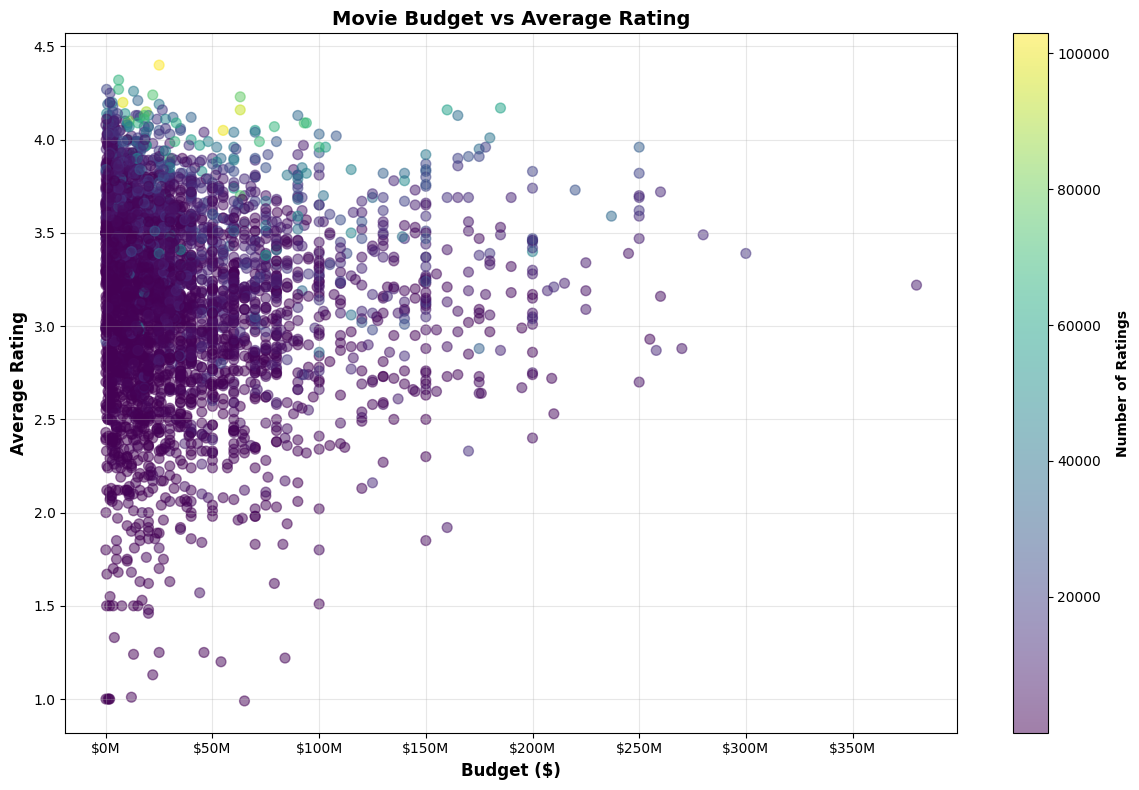

Scatter plot created successfully!
Total movies plotted: 3707
Budget range: $1 - $380,000,000
Rating range: 1.0 - 4.4


In [35]:
# Join with ratings and create scatter plot
print("\nJoining with ratings table")
print("=" * 100)

# 1. Calculate average rating per movie from ratings table
movie_avg_ratings = (
    ratings
    .group_by("movieId")
    .agg([
        pl.col("rating").mean().round(2).alias("avg_rating"),
        pl.col("rating").count().alias("num_ratings")
    ])
)

print(f"Movies with ratings: {len(movie_avg_ratings)}")
print()

# 2. Join links_with_metadata with ratings
final_data = (
    links_with_metadata
    .join(movie_avg_ratings, left_on="movieId", right_on="movieId", how="inner")
)

# Filter for movies with budget > 0
plot_data = final_data.filter(pl.col("budget") > 0)

print(f"Movies with budget and ratings: {len(plot_data)}")
print()

# 3. Create scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(
    plot_data["budget"],
    plot_data["avg_rating"],
    alpha=0.5,
    s=50,
    c=plot_data["num_ratings"],
    cmap="viridis"
)

ax.set_xlabel("Budget ($)", fontsize=12, fontweight="bold")
ax.set_ylabel("Average Rating", fontsize=12, fontweight="bold")
ax.set_title("Movie Budget vs Average Rating", fontsize=14, fontweight="bold")

ax.ticklabel_format(style="plain", axis="x")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x/1e6:.0f}M"))

ax.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Number of Ratings", fontweight="bold")

plt.tight_layout()
plt.show()

print("Scatter plot created successfully!")
print(f"Total movies plotted: {len(plot_data)}")
print(f"Budget range: ${plot_data['budget'].min():,.0f} - ${plot_data['budget'].max():,.0f}")
print(f"Rating range: {plot_data['avg_rating'].min():.1f} - {plot_data['avg_rating'].max():.1f}")



Language Analysis in Movies
Total movies with language info: 4803

Top 20 Languages in Movies
shape: (20, 2)
┌───────────────────┬───────┐
│ original_language ┆ count │
│ ---               ┆ ---   │
│ str               ┆ u32   │
╞═══════════════════╪═══════╡
│ en                ┆ 4505  │
│ fr                ┆ 70    │
│ es                ┆ 32    │
│ de                ┆ 27    │
│ zh                ┆ 27    │
│ hi                ┆ 19    │
│ ja                ┆ 16    │
│ it                ┆ 14    │
│ cn                ┆ 12    │
│ ko                ┆ 11    │
│ ru                ┆ 11    │
│ pt                ┆ 9     │
│ da                ┆ 7     │
│ sv                ┆ 5     │
│ nl                ┆ 4     │
│ fa                ┆ 4     │
│ he                ┆ 3     │
│ th                ┆ 3     │
│ cs                ┆ 2     │
│ id                ┆ 2     │
└───────────────────┴───────┘



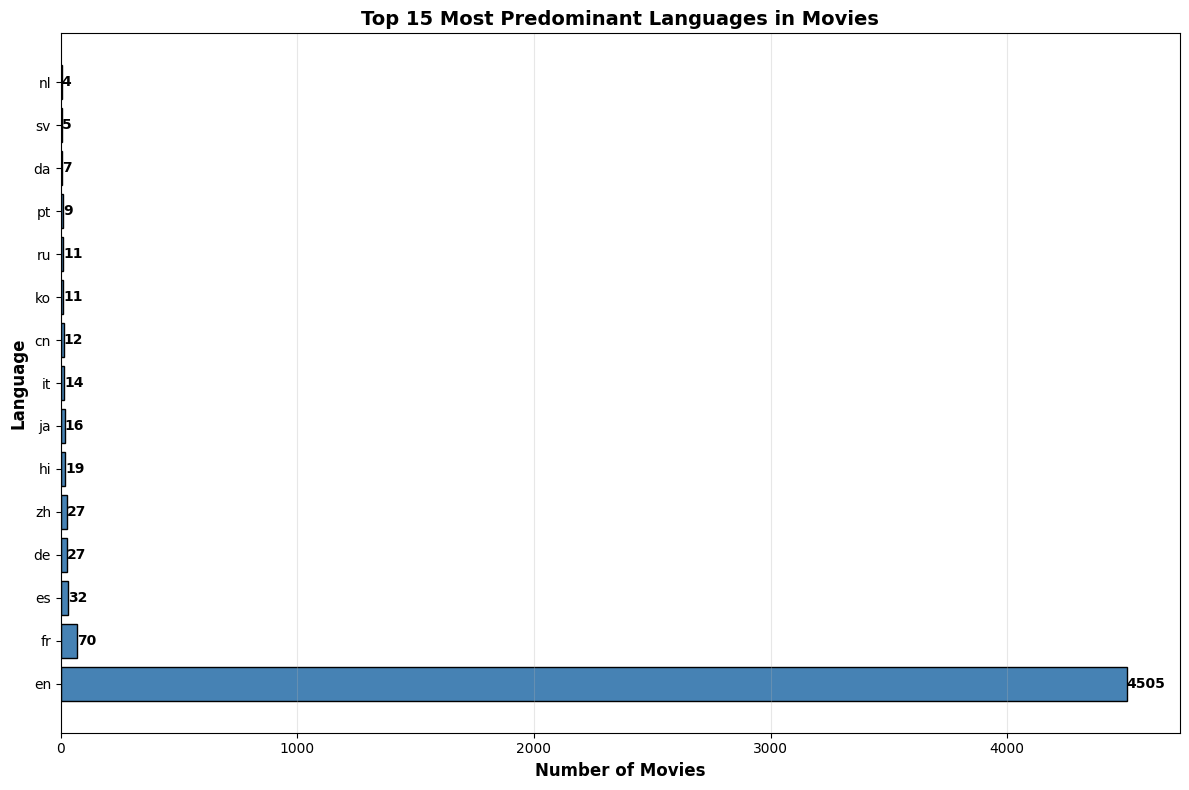

Language Distribution Summary
Total movies with language information: 4803
Number of unique languages: 37
Most common language: en (4505 movies)
Movies in top language: 93.8%

Language Statistics
Average movies per language: 129.8
Median movies per language: 2.0
Max movies (single language): 4505
Min movies (single language): 1


In [9]:
# Analyze language distribution in metadata_tmdb
print("\nLanguage Analysis in Movies")
print("=" * 100)

# 1. Parse the original_language column from metadata_tmdb
language_data = (
    metadata_tmdb
    .select(["id", "title", "original_language"])
    .filter(pl.col("original_language").is_not_null())
    .filter(pl.col("original_language") != "")
)

print(f"Total movies with language info: {len(language_data)}")
print()

# 2. Count movies per language
language_counts = (
    language_data
    .group_by("original_language")
    .agg(pl.col("id").count().alias("count"))
    .sort("count", descending=True)
)

print("Top 20 Languages in Movies")
print("=" * 100)
with pl.Config(tbl_rows=-1, tbl_cols=-1):
    print(language_counts.head(20))
print()

# 3. Create a bar chart for top languages
top_languages = language_counts.head(15)

fig, ax = plt.subplots(figsize=(12, 8))

languages = top_languages["original_language"].to_list()
counts = top_languages["count"].to_list()

bars = ax.barh(languages, counts, color="steelblue", edgecolor="black")

ax.set_xlabel("Number of Movies", fontsize=12, fontweight="bold")
ax.set_ylabel("Language", fontsize=12, fontweight="bold")
ax.set_title("Top 15 Most Predominant Languages in Movies", fontsize=14, fontweight="bold")

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, 
            f"{int(width)}", 
            ha="left", va="center", fontweight="bold", fontsize=10)

ax.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

print("Language Distribution Summary")
print("=" * 100)
total_movies_with_lang = language_counts["count"].sum()
print(f"Total movies with language information: {total_movies_with_lang}")
print(f"Number of unique languages: {len(language_counts)}")
print(f"Most common language: {language_counts['original_language'][0]} ({language_counts['count'][0]} movies)")
print(f"Movies in top language: {(language_counts['count'][0] / total_movies_with_lang * 100):.1f}%")
print()

# Show language statistics
print("Language Statistics")
print("=" * 100)
print(f"Average movies per language: {language_counts['count'].mean():.1f}")
print(f"Median movies per language: {language_counts['count'].median():.1f}")
print(f"Max movies (single language): {language_counts['count'].max()}")
print(f"Min movies (single language): {language_counts['count'].min()}")



PRODUCTION COUNTRIES ANALYSIS - WORLD MAP VISUALIZATION

[STEP 1] Parsing production_countries JSON column...
------------------------------------------------------------------------------------------------------------------------
✓ Total movies with production country data: 4803

[STEP 2] Exploding countries (one row per movie-country pair)...
------------------------------------------------------------------------------------------------------------------------
✓ Total country assignments: 6436
✓ Unique countries: 88

[STEP 3] Counting movies per country...
------------------------------------------------------------------------------------------------------------------------
✓ Country count analysis:
  - Total unique countries: 88
  - Max movies in one country: 3956
  - Min movies in one country: 1
  - Average movies per country: 73.14

Top 20 Countries by Movie Production:
-------------------------------------------------------------------------------------------------------------

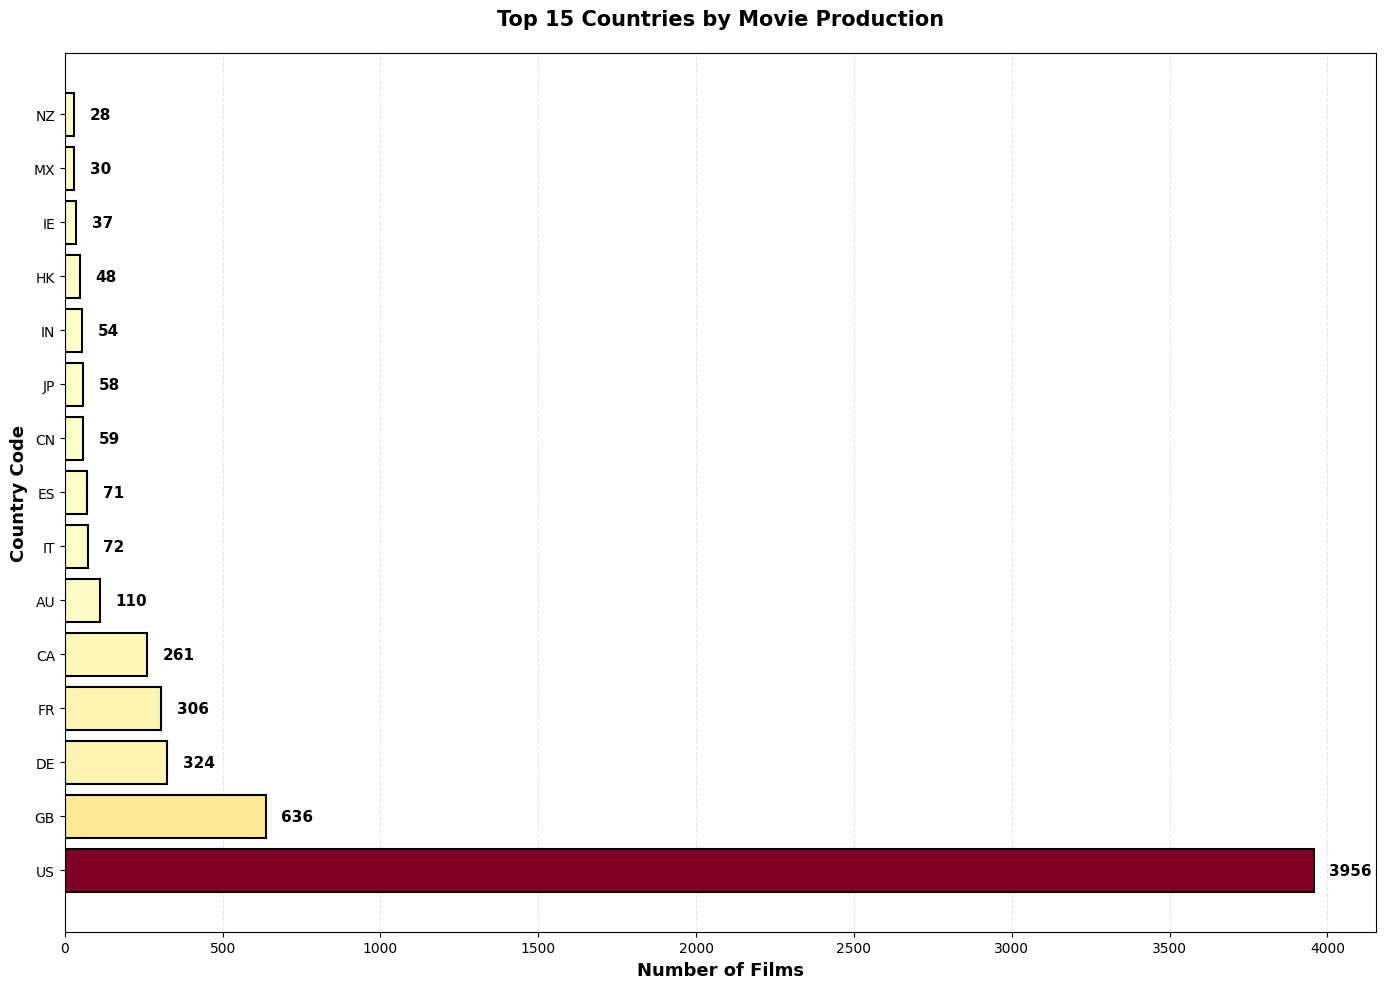

✓ Bar chart created successfully!

[STEP 7] Summary Statistics

Total Movies Analyzed: 4,803
Total Unique Countries: 88
Total Country Assignments: 6,436

Top 5 Production Countries:
------------------------------------------------------------------------------------------------------------------------
  1. US: 3,956 films (61.5%)
  2. GB: 636 films (9.9%)
  3. DE: 324 films (5.0%)
  4. FR: 306 films (4.8%)
  5. CA: 261 films (4.1%)

Production Distribution:
------------------------------------------------------------------------------------------------------------------------
  Average films per country: 73.1
  Median films per country: 3.0
  Std Dev: 427.41
  Max (single country): 3956
  Min (single country): 1

[STEP 8] Multi-Country Co-Productions Analysis

Distribution by number of countries per movie:
------------------------------------------------------------------------------------------------------------------------
shape: (10, 2)
┌───────────────┬───────┐
│ num_countries ┆ co

In [11]:
# PRODUCTION COUNTRIES ANALYSIS WITH WORLD MAP VISUALIZATION
# This script parses production_countries JSON, counts movies per country, and creates visualizations

print("\n" + "="*120)
print("PRODUCTION COUNTRIES ANALYSIS - WORLD MAP VISUALIZATION")
print("="*120)

# Step 1: Parse production_countries column
print("\n[STEP 1] Parsing production_countries JSON column...")
print("-"*120)

def parse_production_countries(countries_str):
    """Parse JSON production countries string and extract country ISO codes"""
    if not countries_str or countries_str == "":
        return []
    try:
        countries_list = json.loads(countries_str)
        return [country['iso_3166_1'] for country in countries_list if 'iso_3166_1' in country]
    except:
        return []

# Apply the function to parse production countries
metadata_with_countries = (
    metadata_tmdb
    .select(["id", "title", "production_countries"])
    .filter(pl.col("production_countries").is_not_null())
    .filter(pl.col("production_countries") != "")
    .with_columns(
        pl.col("production_countries").map_elements(
            parse_production_countries, 
            return_dtype=pl.List(pl.Utf8)
        ).alias("countries_list")
    )
)

print(f"✓ Total movies with production country data: {len(metadata_with_countries)}")

# Step 2: Explode countries - one row per country per movie
print("\n[STEP 2] Exploding countries (one row per movie-country pair)...")
print("-"*120)

exploded_countries = (
    metadata_with_countries
    .explode("countries_list")
    .rename({"countries_list": "country_code"})
    .filter(pl.col("country_code").is_not_null())
)

print(f"✓ Total country assignments: {len(exploded_countries)}")
print(f"✓ Unique countries: {exploded_countries.select('country_code').n_unique()}")

# Step 3: Count movies per country
print("\n[STEP 3] Counting movies per country...")
print("-"*120)

country_counts = (
    exploded_countries
    .group_by("country_code")
    .agg(pl.col("id").count().alias("num_movies"))
    .sort("num_movies", descending=True)
)

print(f"✓ Country count analysis:")
print(f"  - Total unique countries: {len(country_counts)}")
print(f"  - Max movies in one country: {country_counts['num_movies'].max()}")
print(f"  - Min movies in one country: {country_counts['num_movies'].min()}")
print(f"  - Average movies per country: {country_counts['num_movies'].mean():.2f}")
print()

print("Top 20 Countries by Movie Production:")
print("-"*120)
top_20 = country_counts.head(20)
with pl.Config(tbl_rows=-1, tbl_cols=-1):
    print(top_20)

# Step 4: Convert to Pandas for visualization
print("\n[STEP 4] Preparing data for visualization...")
print("-"*120)

country_counts_pd = country_counts.to_pandas()
print(f"✓ Data prepared for visualization: {len(country_counts_pd)} countries")

# Step 5: Create World Map Visualization using Plotly
print("\n[STEP 5] Creating interactive world map with Plotly...")
print("-"*120)

try:
    import plotly.graph_objects as go
    import plotly.express as px
    
    # Create choropleth map
    fig = go.Figure(data=go.Choropleth(
        locations=country_counts_pd['country_code'],
        z=country_counts_pd['num_movies'],
        text=country_counts_pd['country_code'],
        colorscale='YlOrRd',  # Yellow to Red color scale
        autocolorscale=False,
        reversescale=False,
        marker_line_color='white',
        marker_line_width=0.5,
        colorbar=dict(
            title="Number of<br>Films",
            thickness=15,
            len=0.7,
            x=0.92
        ),
        hovertemplate='<b>%{text}</b><br>Films Produced: %{z}<extra></extra>',
    ))
    
    fig.update_layout(
        title_text='<b>World Map: Movie Production by Country</b><br><sub>Based on TMDB metadata (Total: {} movies across {} countries)</sub>'.format(
            len(metadata_with_countries),
            len(country_counts_pd)
        ),
        geo=dict(
            showland=True,
            landcolor='rgb(243, 243, 243)',
            coastlinecolor='rgb(204, 204, 204)',
            projection_type='natural earth',
            showlakes=True,
            lakecolor='rgb(255, 255, 255)',
            showocean=True,
            oceancolor='rgb(230, 245, 255)',
            showcountries=True,
            countrycolor='rgb(204, 204, 204)',
        ),
        height=700,
        width=1400,
        font=dict(size=12),
        showlegend=False,
    )
    
    # Save as interactive HTML
    output_file = r'C:\Users\marti\OneDrive\Documentos\IMS_EDSA\B.D.F\world_map_movie_production_interactive.html'
    fig.write_html(output_file)
    print(f"✓ Interactive world map saved to:")
    print(f"  {output_file}")
    print(f"  → Open this file in your web browser for interactive exploration!")
    print()
    
    # Display in notebook
    fig.show()
    
except Exception as e:
    print(f"✗ Error creating Plotly map: {str(e)}")
    print("  Will create alternative visualization...")

# Step 6: Create Bar Chart of Top Countries
print("\n[STEP 6] Creating bar chart of top countries...")
print("-"*120)

fig_bar, ax_bar = plt.subplots(figsize=(14, 10))

top_15 = country_counts.head(15).to_pandas()
countries = top_15['country_code'].to_list()
counts = top_15['num_movies'].to_list()

# Create color gradient
colors = plt.cm.YlOrRd([(c - min(counts)) / (max(counts) - min(counts)) for c in counts])

bars = ax_bar.barh(countries, counts, color=colors, edgecolor='black', linewidth=1.5)

ax_bar.set_xlabel('Number of Films', fontsize=13, fontweight='bold')
ax_bar.set_ylabel('Country Code', fontsize=13, fontweight='bold')
ax_bar.set_title('Top 15 Countries by Movie Production', fontsize=15, fontweight='bold', pad=20)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax_bar.text(width + 50, bar.get_y() + bar.get_height()/2, 
            f'{int(width)}', 
            ha='left', va='center', fontweight='bold', fontsize=11)

ax_bar.grid(axis='x', alpha=0.3, linestyle='--')
ax_bar.set_axisbelow(True)

plt.tight_layout()
plt.show()

print("✓ Bar chart created successfully!")

# Step 7: Create Summary Statistics
print("\n[STEP 7] Summary Statistics")
print("="*120)

print(f"\nTotal Movies Analyzed: {len(metadata_with_countries):,}")
print(f"Total Unique Countries: {len(country_counts)}")
print(f"Total Country Assignments: {country_counts['num_movies'].sum():,}")
print()

print("Top 5 Production Countries:")
print("-"*120)
for idx, row in country_counts.head(5).to_pandas().iterrows():
    country = row['country_code']
    num_movies = int(row['num_movies'])
    percentage = (num_movies / country_counts['num_movies'].sum() * 100)
    print(f"  {idx+1}. {country}: {num_movies:,} films ({percentage:.1f}%)")

print()
print("Production Distribution:")
print("-"*120)
print(f"  Average films per country: {country_counts['num_movies'].mean():.1f}")
print(f"  Median films per country: {country_counts['num_movies'].median():.1f}")
print(f"  Std Dev: {country_counts['num_movies'].std():.2f}")
print(f"  Max (single country): {country_counts['num_movies'].max()}")
print(f"  Min (single country): {country_counts['num_movies'].min()}")

# Step 8: Multi-country Co-productions Analysis
print("\n[STEP 8] Multi-Country Co-Productions Analysis")
print("="*120)

coproduction_counts = (
    metadata_with_countries
    .with_columns(
        pl.col("countries_list").list.len().alias("num_countries")
    )
    .group_by("num_countries")
    .agg(pl.col("id").count().alias("count"))
    .sort("num_countries")
)

print("\nDistribution by number of countries per movie:")
print("-"*120)
with pl.Config(tbl_rows=-1, tbl_cols=-1):
    print(coproduction_counts)

print()
print("Key Insights:")
print("-"*120)
solo_prod = coproduction_counts.filter(pl.col("num_countries") == 1)['count'].sum()
multi_prod = coproduction_counts.filter(pl.col("num_countries") > 1)['count'].sum()
print(f"  - Solo productions (1 country): {solo_prod:,} ({solo_prod/len(metadata_with_countries)*100:.1f}%)")
print(f"  - Co-productions (2+ countries): {multi_prod:,} ({multi_prod/len(metadata_with_countries)*100:.1f}%)")

print("\n" + "="*120)
print("✓ ANALYSIS COMPLETE!")
print("="*120)



[STATIC MAP] Creating static choropleth world map with GeoPandas...
------------------------------------------------------------------------------------------------------------------------
✓ Loaded world map with 177 countries from Natural Earth
Available columns in world data: ['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'AD

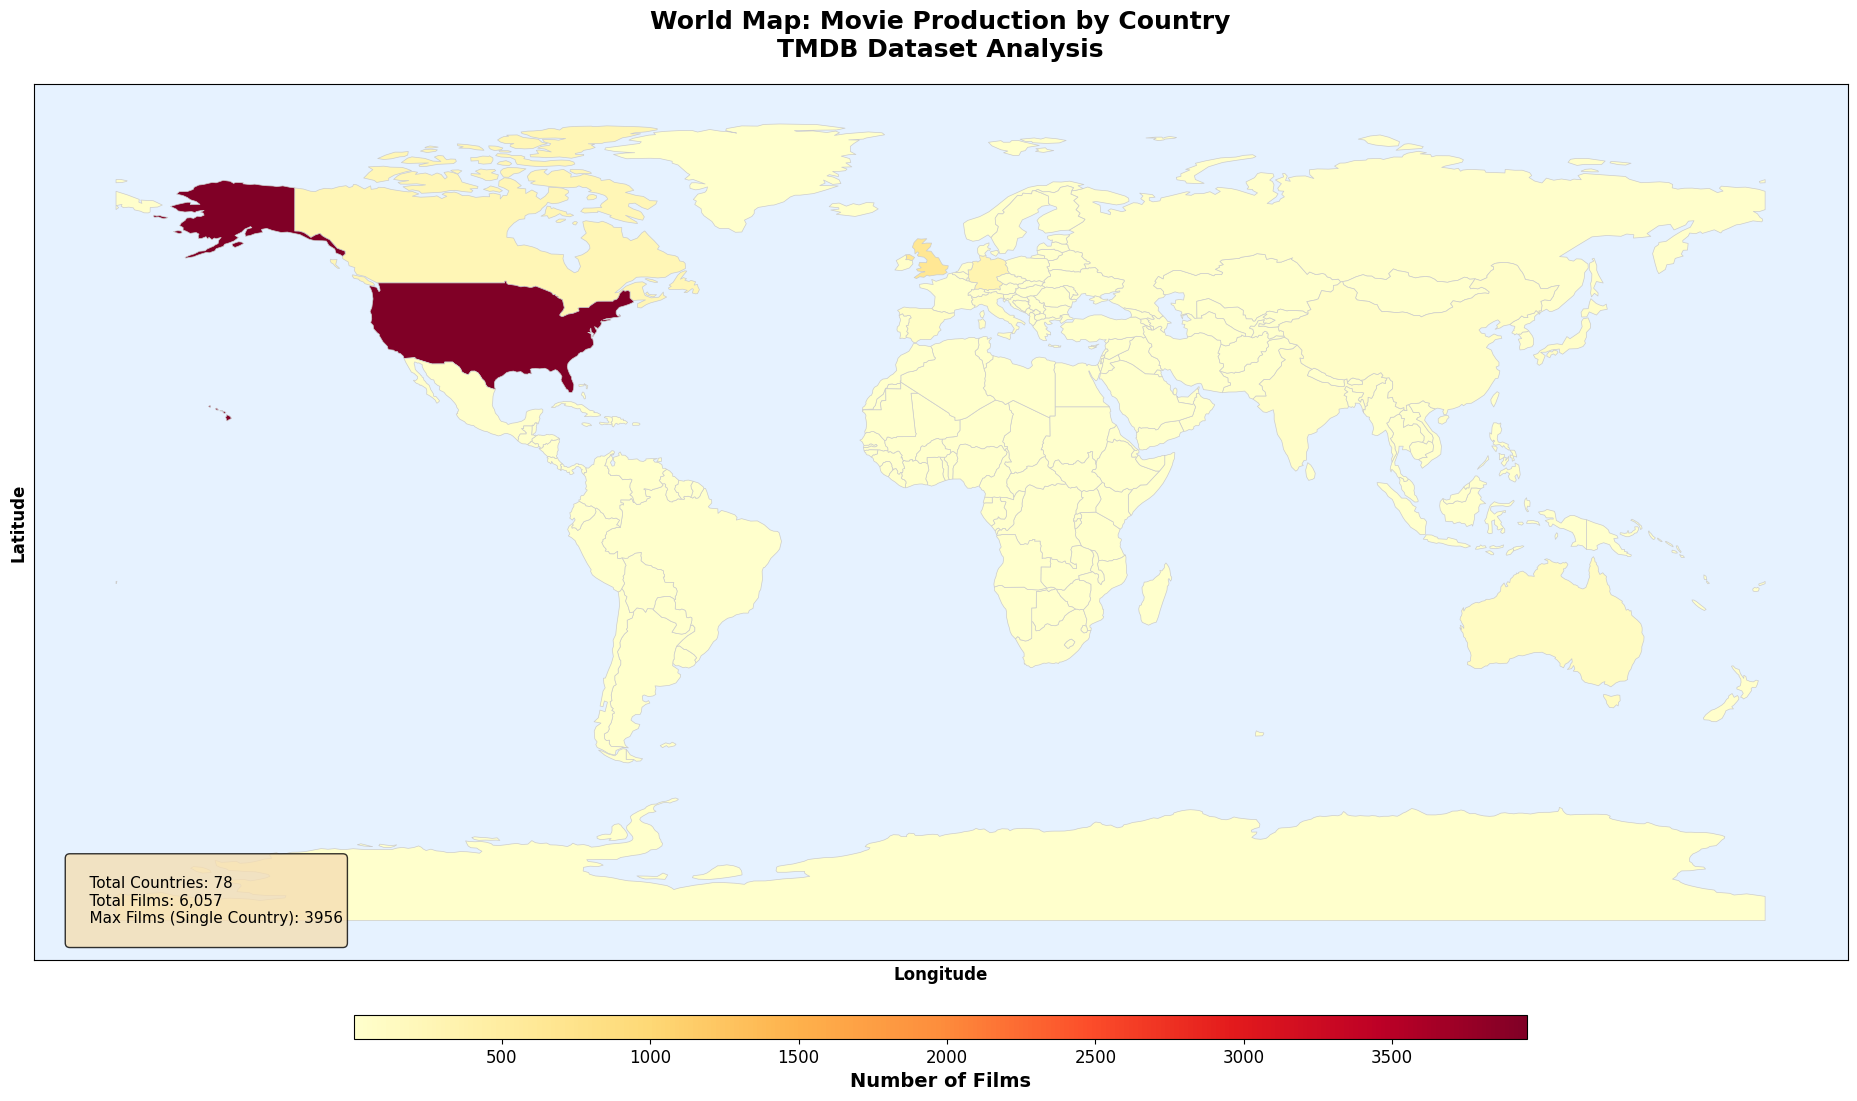

✓✓✓ STATIC CHOROPLETH MAP CREATED SUCCESSFULLY! ✓✓✓

✓ MAP DETAILS:
  ✓ Resolution: 300 DPI (high quality)
  ✓ Size: 20x12 inches
  ✓ Color scale: Yellow (few films) → Dark Red (many films)
  ✓ Gray countries: No film production data

✓ TOP COUNTRIES ON THE MAP:
   1. US :  3956 films
   2. GB :   636 films
   3. DE :   324 films
   4. FR :   306 films
   5. CA :   261 films
   6. AU :   110 films
   7. IT :    72 films
   8. ES :    71 films
   9. CN :    59 films
  10. JP :    58 films


In [18]:
# Create static world map using GeoPandas and Matplotlib
print("\n[STATIC MAP] Creating static choropleth world map with GeoPandas...")
print("-"*120)

try:
    import geopandas as gpd
    import pandas as pd
    from matplotlib.colors import Normalize
    from matplotlib.cm import ScalarMappable
    
    # Load world map data from Natural Earth
    url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
    world = gpd.read_file(url)
    print(f"✓ Loaded world map with {len(world)} countries from Natural Earth")
    
    # Create mapping from ISO 2-letter to 3-letter codes
    iso2_to_iso3_mapping = {
        'US': 'USA', 'GB': 'GBR', 'DE': 'DEU', 'FR': 'FRA', 'CA': 'CAN',
        'AU': 'AUS', 'IT': 'ITA', 'ES': 'ESP', 'CN': 'CHN', 'JP': 'JPN',
        'IN': 'IND', 'HK': 'HKG', 'IE': 'IRL', 'MX': 'MEX', 'NZ': 'NZL',
        'BE': 'BEL', 'CZ': 'CZE', 'DK': 'DNK', 'ZA': 'ZAF', 'RU': 'RUS',
        'SE': 'SWE', 'NL': 'NLD', 'AT': 'AUT', 'CH': 'CHE', 'PL': 'POL',
        'BR': 'BRA', 'AR': 'ARG', 'KR': 'KOR', 'SG': 'SGP', 'TH': 'THA',
        'MY': 'MYS', 'PH': 'PHL', 'ID': 'IDN', 'VN': 'VNM', 'TR': 'TUR',
        'GR': 'GRC', 'PT': 'PRT', 'NO': 'NOR', 'FI': 'FIN', 'IL': 'ISR',
        'SA': 'SAU', 'AE': 'ARE', 'NG': 'NGA', 'EG': 'EGY', 'KE': 'KEN',
        'MK': 'MKD', 'RS': 'SRB', 'HR': 'HRV', 'SI': 'SVN', 'RO': 'ROU',
        'BG': 'BGR', 'HU': 'HUN', 'SK': 'SVK', 'LT': 'LTU', 'LV': 'LVA',
        'EE': 'EST', 'UA': 'UKR', 'BY': 'BLR', 'KZ': 'KAZ', 'UZ': 'UZB',
        'TJ': 'TJK', 'KG': 'KGZ', 'TM': 'TKM', 'MN': 'MNG', 'TW': 'TWN',
        'PK': 'PAK', 'BD': 'BGD', 'LK': 'LKA', 'MM': 'MMR', 'KH': 'KHM',
        'LA': 'LAO', 'CL': 'CHL', 'CO': 'COL', 'PE': 'PER', 'EC': 'ECU',
        'VE': 'VEN', 'BO': 'BOL', 'PY': 'PRY', 'UY': 'URY', 'CU': 'CUB',
        'PR': 'PRI', 'DO': 'DOM', 'CR': 'CRI', 'PA': 'PAN', 'SV': 'SLV',
        'HN': 'HND', 'NI': 'NIC', 'GT': 'GTM', 'BZ': 'BLZ', 'JM': 'JAM',
        'TT': 'TTO', 'BB': 'BRB', 'LC': 'LCA', 'VC': 'VCT', 'AG': 'ATG',
        'KN': 'KNA', 'DM': 'DMA', 'GD': 'GRD', 'BS': 'BHS',
        'LU': 'LUX', 'IS': 'ISL', 'IR': 'IRN', 'MT': 'MLT', 'MA': 'MAR',
        'CS': 'CSK', 'MC': 'MCO', 'AO': 'AGO', 'GP': 'GLP', 'GY': 'GUY',
        'LY': 'LBY', 'TN': 'TUN', 'AF': 'AFG', 'FJ': 'FJI', 'BA': 'BIH',
        'CM': 'CMR', 'BT': 'BTN', 'JO': 'JOR', 'DZ': 'DZA', 'AW': 'ABW',
        'LB': 'LBN', 'CY': 'CYP'
    }
    
    # Map 2-letter codes to 3-letter codes
    country_counts_mapped = country_counts_pd.copy()
    country_counts_mapped['iso_a3'] = country_counts_mapped['country_code'].map(iso2_to_iso3_mapping)
    
    # Check available columns in world geodataframe
    print(f"Available columns in world data: {world.columns.tolist()}")
    
    # Use the correct column name (check ISO_A3 or iso_a3)
    iso_col = 'ISO_A3' if 'ISO_A3' in world.columns else 'iso_a3'
    print(f"Using column: {iso_col}")
    
    # Merge with world geodataframe using the correct column name
    world_with_data = world.merge(country_counts_mapped, left_on=iso_col, right_on='iso_a3', how='left')
    
    # Fill NaN values with 0 for countries without film data
    world_with_data['num_movies'] = world_with_data['num_movies'].fillna(0)
    
    print(f"✓ Matched {(world_with_data['num_movies'] > 0).sum()} countries with film production data")
    
    # Create the static choropleth map
    fig, ax = plt.subplots(figsize=(20, 12))
    
    # Set background color
    ax.set_facecolor('#e6f2ff')
    fig.patch.set_facecolor('white')
    
    # Plot all countries with light gray for those with no data
    world_with_data.plot(
        ax=ax,
        column='num_movies',
        cmap='YlOrRd',
        legend=False,
        edgecolor='0.8',
        linewidth=0.5,
        missing_kwds={'facecolor': '#f0f0f0', 'edgecolor': '#999999', 'linewidth': 0.5}
    )
    
    # Add colorbar
    vmin = world_with_data[world_with_data['num_movies'] > 0]['num_movies'].min()
    vmax = world_with_data['num_movies'].max()
    norm = Normalize(vmin=vmin, vmax=vmax)
    sm = ScalarMappable(cmap='YlOrRd', norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, shrink=0.6, aspect=50)
    cbar.set_label('Number of Films', fontsize=14, fontweight='bold')
    cbar.ax.tick_params(labelsize=12)
    
    # Add title and labels
    ax.set_title('World Map: Movie Production by Country\nTMDB Dataset Analysis', 
                 fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Longitude', fontsize=12, fontweight='bold')
    ax.set_ylabel('Latitude', fontsize=12, fontweight='bold')
    
    # Remove axis labels for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add text with data summary
    summary_text = f"""
    Total Countries: {len(world_with_data[world_with_data['num_movies'] > 0])}
    Total Films: {int(world_with_data['num_movies'].sum()):,}
    Max Films (Single Country): {int(world_with_data['num_movies'].max())}
    """
    ax.text(0.02, 0.02, summary_text, transform=ax.transAxes, fontsize=11,
            verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    
    # Save the map
    output_file = r'C:\Users\marti\OneDrive\Documentos\IMS_EDSA\B.D.F\world_map_movie_production_static.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✓ Static map saved to:")
    print(f"  {output_file}")
    print()
    
    plt.show()
    
    print(f"✓✓✓ STATIC CHOROPLETH MAP CREATED SUCCESSFULLY! ✓✓✓")
    print()
    print(f"✓ MAP DETAILS:")
    print(f"  ✓ Resolution: 300 DPI (high quality)")
    print(f"  ✓ Size: 20x12 inches")
    print(f"  ✓ Color scale: Yellow (few films) → Dark Red (many films)")
    print(f"  ✓ Gray countries: No film production data")
    print()
    print(f"✓ TOP COUNTRIES ON THE MAP:")
    top_10 = country_counts_mapped.nlargest(10, 'num_movies')
    for idx, (_, row) in enumerate(top_10.iterrows(), 1):
        print(f"  {idx:2d}. {row['country_code']:3s}: {int(row['num_movies']):5d} films")
    
except ImportError:
    print(f"✗ GeoPandas not installed. Installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'geopandas'])
    print(f"✓ GeoPandas installed. Please re-run this cell.")
except Exception as e:
    print(f"✗ Error creating static map: {str(e)}")
    import traceback
    traceback.print_exc()



RING PLOT: AMERICAN FILMS vs REST OF WORLD
✓ Total movies: 4803

DEBUG - Sample countries_list:
  Row 0: ['US' 'GB'] (type: <class 'numpy.ndarray'>)
  Row 1: ['US'] (type: <class 'numpy.ndarray'>)
  Row 2: ['GB' 'US'] (type: <class 'numpy.ndarray'>)

[STEP 2] Classifying films as American vs Rest of World...
✓ American films: 3956 (82.4%)
✓ Rest of World: 847 (17.6%)



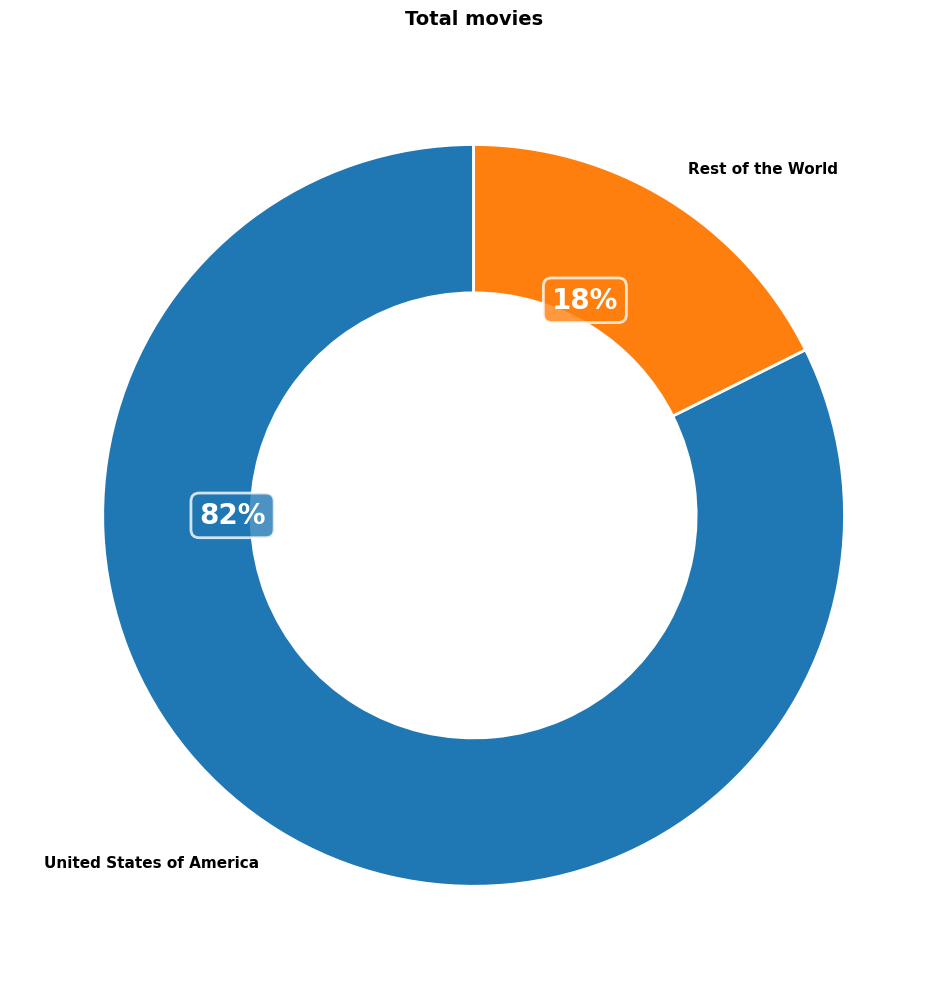

✓ Ring plot created successfully!
✓ Total movies analyzed: 4,803
✓ Ratio: 1 US film : 0.21 Rest of World films


In [17]:
# RING PLOT: USA vs REST OF WORLD
import numpy as np

print("\n" + "="*120)
print("RING PLOT: AMERICAN FILMS vs REST OF WORLD")
print("="*120)

# Step 1: Parse production_countries
def parse_production_countries(countries_str):
    if not countries_str or countries_str == "":
        return []
    try:
        countries_list = json.loads(countries_str)
        return [country['iso_3166_1'] for country in countries_list if 'iso_3166_1' in country]
    except:
        return []

metadata_with_countries = (
    metadata_tmdb
    .select(["id", "title", "production_countries"])
    .filter(pl.col("production_countries").is_not_null())
    .filter(pl.col("production_countries") != "")
    .with_columns(
        pl.col("production_countries").map_elements(parse_production_countries, return_dtype=pl.List(pl.Utf8)).alias("countries_list")
    )
)

print(f"✓ Total movies: {len(metadata_with_countries)}")

# Debug: Check actual values
print("\nDEBUG - Sample countries_list:")
samples = metadata_with_countries.select("countries_list").head(3).to_pandas()
for idx, row in samples.iterrows():
    print(f"  Row {idx}: {row['countries_list']} (type: {type(row['countries_list'])})")

# Step 2: Classify using explode method (more reliable)
print("\n[STEP 2] Classifying films as American vs Rest of World...")

# Explode and filter for US
exploded = metadata_with_countries.explode("countries_list")
us_films = exploded.filter(pl.col("countries_list") == "US").select("id").unique()
us_count = len(us_films)

# All movies that have production country data
all_movies = metadata_with_countries.select("id").unique()
rest_count = len(all_movies) - us_count

print(f"✓ American films: {us_count} ({us_count/len(all_movies)*100:.1f}%)")
print(f"✓ Rest of World: {rest_count} ({rest_count/len(all_movies)*100:.1f}%)")
print()

# Step 3: Create Ring Plot
fig, ax = plt.subplots(figsize=(12, 10))

sizes = [us_count, rest_count]
labels = ['United States of America', 'Rest of the World']
colors = ['#1f77b4', '#ff7f0e']

wedges, texts = ax.pie(sizes, labels=labels, colors=colors, startangle=90,
    textprops={'fontsize': 11, 'weight': 'bold'},
    wedgeprops=dict(width=0.4, edgecolor='white', linewidth=2))

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
ax.add_artist(centre_circle)

ax.set_title('Total movies', fontsize=14, fontweight='bold', pad=20)

total_with_country_data = len(all_movies)
percentage_us = (us_count / total_with_country_data * 100) if total_with_country_data > 0 else 0
percentage_row = (rest_count / total_with_country_data * 100) if total_with_country_data > 0 else 0

# Position percentages in the correct sections of the ring
if us_count > 0:
    # US: large blue section - place text in center-left area
    ax.text(-0.65, -0.0, f'{percentage_us:.0f}%', fontsize=20, fontweight='bold', color='white', ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='#1f77b4', alpha=0.8, edgecolor='white', linewidth=2))
if rest_count > 0:
    # Rest of World: small orange section on top-right 
    ax.text(0.3, 0.58, f'{percentage_row:.0f}%', fontsize=20, fontweight='bold', color='white', ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='#ff7f0e', alpha=0.8, edgecolor='white', linewidth=2))

plt.tight_layout()
plt.show()

print("✓ Ring plot created successfully!")
print(f"✓ Total movies analyzed: {total_with_country_data:,}")
if us_count > 0:
    print(f"✓ Ratio: 1 US film : {rest_count/us_count:.2f} Rest of World films")


TOP 10 COUNTRIES WITH HIGHEST RATED MOVIES

[STEP 1] Calculating average ratings per movie...
✓ Movies with ratings data: 84,432

[STEP 2] Joining TMDB metadata with MovieLens ratings...
✓ Movies matched between links and TMDB: 4,637
✓ Movies with both TMDB and rating data: 4,633

[STEP 3] Parsing production countries and filtering...
✓ Movies with production country data: 4,510

[STEP 4] Calculating average rating per country...
✓ Analysis complete for 10 countries (with at least 3 movies)

TOP 10 COUNTRIES WITH HIGHEST AVERAGE MOVIE RATINGS

Detailed Breakdown:
------------------------------------------------------------------------------------------------------------------------
shape: (10, 5)
┌──────────────┬────────────────────┬────────────┬────────────────┬───────────────┐
│ country_code ┆ avg_country_rating ┆ num_movies ┆ highest_rating ┆ lowest_rating │
│ ---          ┆ ---                ┆ ---        ┆ ---            ┆ ---           │
│ str          ┆ f64                ┆ u32

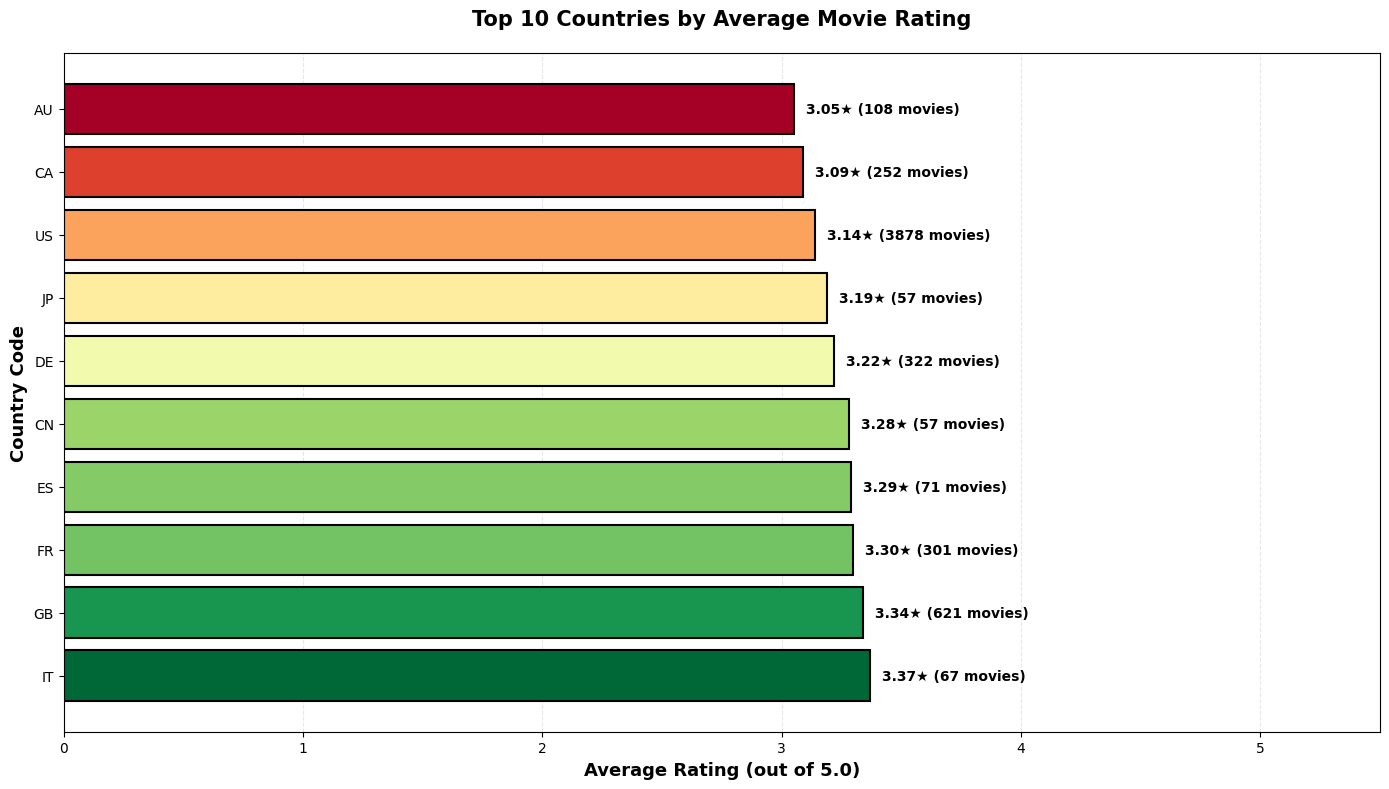


✓ Visualization created successfully!

Key Insights:
  • Highest average rating: 3.37⭐ (IT)
  • Lowest in top 10: 3.05⭐ (AU)
  • Most movies in top 10: 3878 films (US)
  • Fewest movies in top 10: 57 films


In [12]:
# TOP 10 COUNTRIES WITH HIGHEST RATED MOVIES
print("\n" + "="*120)
print("TOP 10 COUNTRIES WITH HIGHEST RATED MOVIES")
print("="*120)

# Step 1: Calculate average ratings per movie
print("\n[STEP 1] Calculating average ratings per movie...")

movie_avg_ratings = (
    ratings
    .group_by("movieId")
    .agg([
        pl.col("rating").mean().round(2).alias("avg_rating"),
        pl.col("rating").count().alias("num_ratings")
    ])
)

print(f"✓ Movies with ratings data: {len(movie_avg_ratings):,}")

# Step 2: Join TMDB metadata with MovieLens ratings via links
print("\n[STEP 2] Joining TMDB metadata with MovieLens ratings...")

# Convert id column to Int64 to match tmdbId type
metadata_for_join = (
    metadata_tmdb
    .select(["id", "title", "production_countries"])
    .with_columns(
        pl.col("id").cast(pl.Int64).alias("tmdbId")
    )
    .drop("id")
)

# Join links with metadata on tmdbId
links_with_metadata = (
    links
    .join(metadata_for_join, left_on="tmdbId", right_on="tmdbId", how="inner")
)

print(f"✓ Movies matched between links and TMDB: {len(links_with_metadata):,}")

# Join with ratings
full_data = (
    links_with_metadata
    .join(movie_avg_ratings, left_on="movieId", right_on="movieId", how="inner")
)

print(f"✓ Movies with both TMDB and rating data: {len(full_data):,}")

# Step 3: Parse production countries and filter
print("\n[STEP 3] Parsing production countries and filtering...")

def parse_production_countries(countries_str):
    if not countries_str or countries_str == "":
        return []
    try:
        countries_list = json.loads(countries_str)
        return [country['iso_3166_1'] for country in countries_list if 'iso_3166_1' in country]
    except:
        return []

# Add parsed countries
full_data_with_countries = (
    full_data
    .with_columns(
        pl.col("production_countries").map_elements(
            parse_production_countries, 
            return_dtype=pl.List(pl.Utf8)
        ).alias("countries_list")
    )
    .filter(pl.col("countries_list").list.len() > 0)  # Only movies with country data
)

print(f"✓ Movies with production country data: {len(full_data_with_countries):,}")

# Step 4: Explode countries and calculate average rating per country
print("\n[STEP 4] Calculating average rating per country...")

country_ratings = (
    full_data_with_countries
    .explode("countries_list")
    .group_by("countries_list")
    .agg([
        pl.col("avg_rating").mean().round(2).alias("avg_country_rating"),
        pl.col("movieId").count().alias("num_movies"),
        pl.col("avg_rating").max().round(2).alias("highest_rating"),
        pl.col("avg_rating").min().round(2).alias("lowest_rating")
    ])
    .filter(pl.col("num_movies") >= 50)  # Filter for countries with at least 3 movies
    .sort("avg_country_rating", descending=True)
    .rename({"countries_list": "country_code"})
)

print(f"✓ Analysis complete for {len(country_ratings)} countries (with at least 3 movies)")

# Step 5: Display Top 10 Countries with Highest Rated Movies
print("\n" + "="*120)
print("TOP 10 COUNTRIES WITH HIGHEST AVERAGE MOVIE RATINGS")
print("="*120)

top_10_countries = country_ratings.head(10)

print("\nDetailed Breakdown:")
print("-"*120)

with pl.Config(tbl_rows=-1, tbl_cols=-1):
    print(top_10_countries)

print("\n" + "-"*120)
print("Summary Statistics:")
print("-"*120)

for idx, row in enumerate(top_10_countries.to_pandas().iterrows(), 1):
    _, data = row
    country = data['country_code']
    avg_rating = data['avg_country_rating']
    num_movies = int(data['num_movies'])
    highest = data['highest_rating']
    lowest = data['lowest_rating']
    
    print(f"\n{idx:2d}. {country}")
    print(f"    Average Rating: ⭐ {avg_rating:.2f}/5.0")
    print(f"    Number of Movies: {num_movies}")
    print(f"    Rating Range: {lowest:.2f} - {highest:.2f}")

# Step 6: Create Visualization
print("\n" + "="*120)
print("CREATING VISUALIZATION...")
print("="*120)

fig, ax = plt.subplots(figsize=(14, 8))

top_10_pd = top_10_countries.to_pandas()
countries = top_10_pd['country_code'].tolist()
ratings_vals = top_10_pd['avg_country_rating'].tolist()
num_movies_vals = top_10_pd['num_movies'].tolist()

# Create color gradient based on rating
colors_gradient = plt.cm.RdYlGn([(r - min(ratings_vals)) / (max(ratings_vals) - min(ratings_vals)) for r in ratings_vals])

bars = ax.barh(countries, ratings_vals, color=colors_gradient, edgecolor='black', linewidth=1.5)

ax.set_xlabel('Average Rating (out of 5.0)', fontsize=13, fontweight='bold')
ax.set_ylabel('Country Code', fontsize=13, fontweight='bold')
ax.set_title('Top 10 Countries by Average Movie Rating', fontsize=15, fontweight='bold', pad=20)

# Add value labels on bars
for i, (bar, rating, num_movies) in enumerate(zip(bars, ratings_vals, num_movies_vals)):
    ax.text(rating + 0.05, bar.get_y() + bar.get_height()/2, 
            f'{rating:.2f}★ ({num_movies} movies)', 
            ha='left', va='center', fontweight='bold', fontsize=10)

ax.set_xlim(0, 5.5)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

print("\n✓ Visualization created successfully!")
print(f"\nKey Insights:")
print(f"  • Highest average rating: {top_10_countries['avg_country_rating'][0]:.2f}⭐ ({top_10_countries['country_code'][0]})")
print(f"  • Lowest in top 10: {top_10_countries['avg_country_rating'][9]:.2f}⭐ ({top_10_countries['country_code'][9]})")
print(f"  • Most movies in top 10: {top_10_countries['num_movies'].max()} films ({top_10_countries.filter(pl.col('num_movies') == top_10_countries['num_movies'].max())['country_code'][0]})")
print(f"  • Fewest movies in top 10: {top_10_countries['num_movies'].min()} films")


CREATING VISUALIZATION...


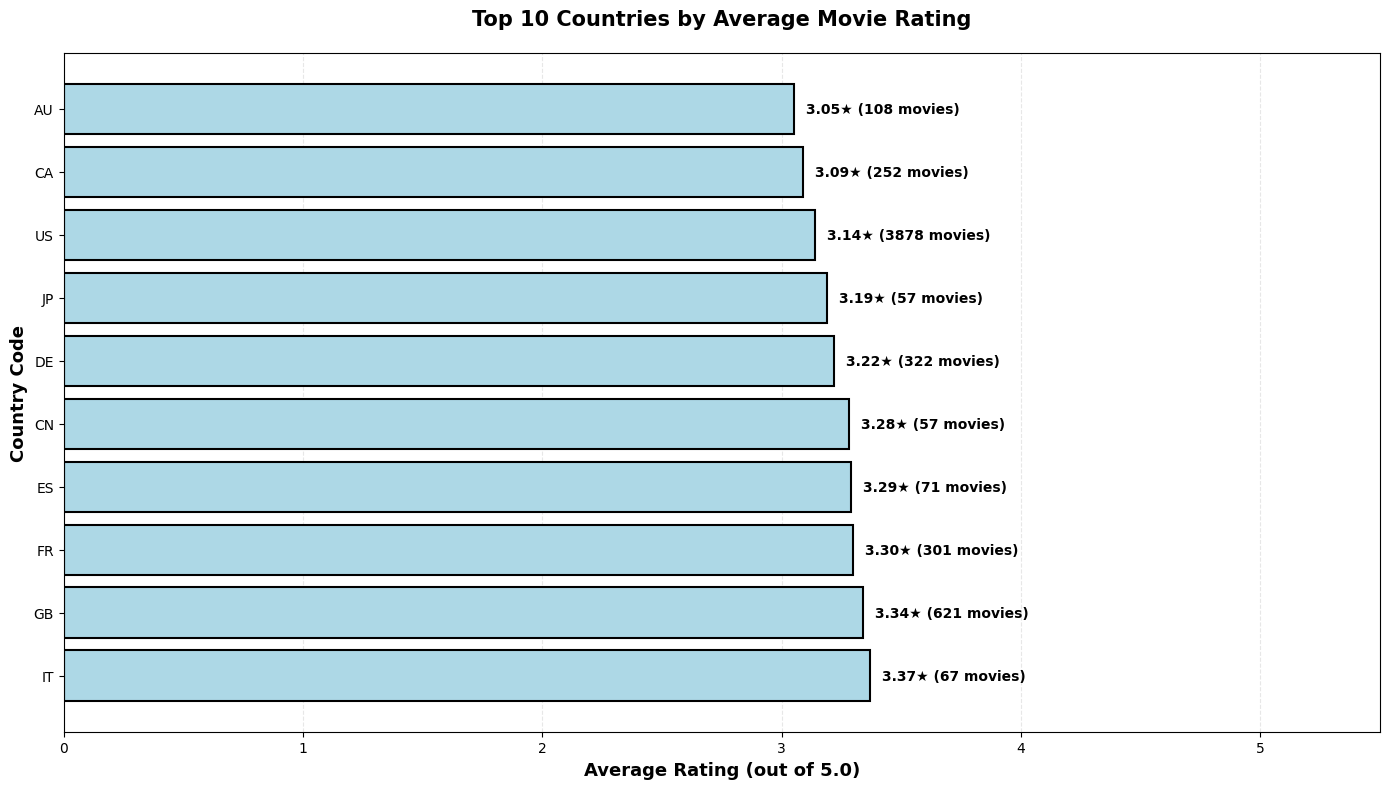


✓ Visualization created successfully!


In [13]:
# STEP 6 — Create Visualization
print("\n" + "="*120)
print("CREATING VISUALIZATION...")
print("="*120)

fig, ax = plt.subplots(figsize=(14, 8))

top_10_pd = top_10_countries.to_pandas()
countries = top_10_pd['country_code'].tolist()
ratings_vals = top_10_pd['avg_country_rating'].tolist()
num_movies_vals = top_10_pd['num_movies'].tolist()

# --- CHANGE MADE HERE: set all bars to light blue ---
bars = ax.barh(
    countries,
    ratings_vals,
    color='#ADD8E6',            # light blue
    edgecolor='black',
    linewidth=1.5
)

ax.set_xlabel('Average Rating (out of 5.0)', fontsize=13, fontweight='bold')
ax.set_ylabel('Country Code', fontsize=13, fontweight='bold')
ax.set_title('Top 10 Countries by Average Movie Rating', fontsize=15, fontweight='bold', pad=20)

# Add value labels on bars
for i, (bar, rating, num_movies) in enumerate(zip(bars, ratings_vals, num_movies_vals)):
    ax.text(
        rating + 0.05,
        bar.get_y() + bar.get_height()/2,
        f'{rating:.2f}★ ({num_movies} movies)',
        ha='left',
        va='center',
        fontweight='bold',
        fontsize=10
    )

ax.set_xlim(0, 5.5)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

print("\n✓ Visualization created successfully!")
